In [19]:
a = '''
\033[1mProblem Statement\033[1m


RFM analysis is a powerful technique used by companies to better understand customer 
behaviour and optimize engagement strategies. It revolves around three key dimensions: 
recency, frequency, and monetary value. These dimensions capture essential aspects of 
customer transactions, providing valuable information for segmentation and personalized 
marketing campaigns.

The given dataset is provided by an e-commerce platform containing customer transaction 
data including customer ID, purchase date, transaction amount, product information, ID 
command and location. The platform aims to leverage RFM (recency, frequency, monetary value)
analysis to segment customers and optimize customer engagement strategies.

\033[1mYour task is to perform RFM analysis and develop customer segments based on their RFM
scores.The analysis should provide insights into customer behaviour and identification of 
high-value customers,at-risk customers, and potential opportunities for personalized marketing 
campaigns.\033[1m

Reference link:
https://statso.io/rfm-analysis-case-study/
''' 
print(a)



Problem Statement


RFM analysis is a powerful technique used by companies to better understand customer 
behaviour and optimize engagement strategies. It revolves around three key dimensions: 
recency, frequency, and monetary value. These dimensions capture essential aspects of 
customer transactions, providing valuable information for segmentation and personalized 
marketing campaigns.

The given dataset is provided by an e-commerce platform containing customer transaction 
data including customer ID, purchase date, transaction amount, product information, ID 
command and location. The platform aims to leverage RFM (recency, frequency, monetary value)
analysis to segment customers and optimize customer engagement strategies.

Your task is to perform RFM analysis and develop customer segments based on their RFM
scores.The analysis should provide insights into customer behaviour and identification of 
high-value customers,at-risk customers, and potential opportunities for personalized

In [2]:
b = '''
\033[1mReading dataset and arranging the data in their respective columns.
This is achieved by using the set_option function set into None and False.
This is part of data preparation.\033[0m

'''
print(b)

import pandas as pd

# read the CSV file
data = pd.read_csv("rfm_data.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)


# Check the rows of DataFrame
print(data.head(1000))





Reading dataset and arranging the data in their respective columns.
This is achieved by using the set_option function set into None and False.
This is part of data preparation.


     CustomerID PurchaseDate  TransactionAmount ProductInformation  OrderID  Location
0          8814   2023-04-11             943.31          Product C   890075     Tokyo
1          2188   2023-04-11             463.70          Product A   176819    London
2          4608   2023-04-11              80.28          Product A   340062  New York
3          2559   2023-04-11             221.29          Product A   239145    London
4          9482   2023-04-11             739.56          Product A   194545     Paris
..          ...          ...                ...                ...      ...       ...
995        2970   2023-06-10             759.62          Product B   275284    London
996        6669   2023-06-10             941.50          Product C   987025  New York
997        8836   2023-06-10             545.3

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd

# Calculate Recency, Frequency, and Monetary scores
today = pd.to_datetime(dt.date(2023, 10, 6))

# Convert purchase date to Timestamp
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'])

# Calculate Recency based on the maximum purchase date
rfm = data.groupby('CustomerID').agg({
    'PurchaseDate': lambda x: (today - x.max()).days,
    'OrderID': 'count',
    'TransactionAmount': 'sum'
})

# Rename columns
rfm.rename(columns={'PurchaseDate': 'Recency', 'OrderID': 'Frequency', 'TransactionAmount': 'Monetary'}, inplace=True)

# Check the RFM DataFrame
print(rfm.head())

# Data visualization using a pie chat

plt.figure(figsize=(6, 6))
plt.pie(rfm['Frequency'], labels=rfm['Recency'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'], pctdistance=0.8)
plt.title('Customer Distribution')
plt.axis('equal')
plt.show()




NameError: name 'data' is not defined

In [11]:
import pandas as pd

# Load data from CSV
data = pd.read_csv("rfm_data.csv")

# Define the number of bins and the labels for each score
num_bins = 5  # You can adjust this value based on your requirements
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
data.rename(columns={'PurchaseDate': 'Recency', 'OrderID': 'Frequency', 'TransactionAmount': 'Monetary'}, inplace=True)

# Calculate Recency, Frequency, and Monetary scores
data['RecencyScore'] = pd.qcut(data['Recency'], q=num_bins, labels=labels)
data['FrequencyScore'] = pd.qcut(data['Frequency'], q=num_bins, labels=labels)
data['MonetaryScore'] = pd.qcut(data['Monetary'], q=num_bins, labels=labels)

# Display the DataFrame with scores
print(data)




       A
0  False
1  False
2   True
3  False


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

            Recency  Frequency  Monetary
CustomerID                              
1                 5          1       100
2                21          1        50
3                16          1        75
4                 4          1       150
5                 2          1       200


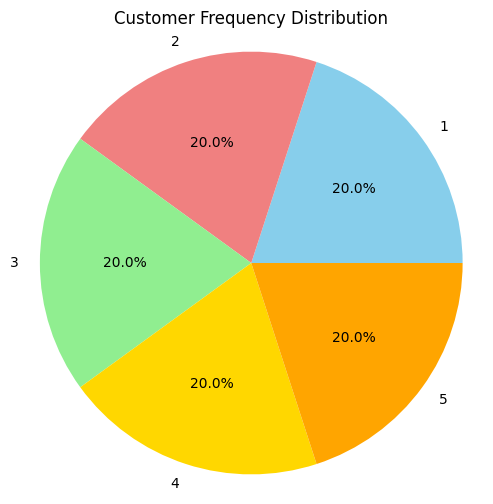

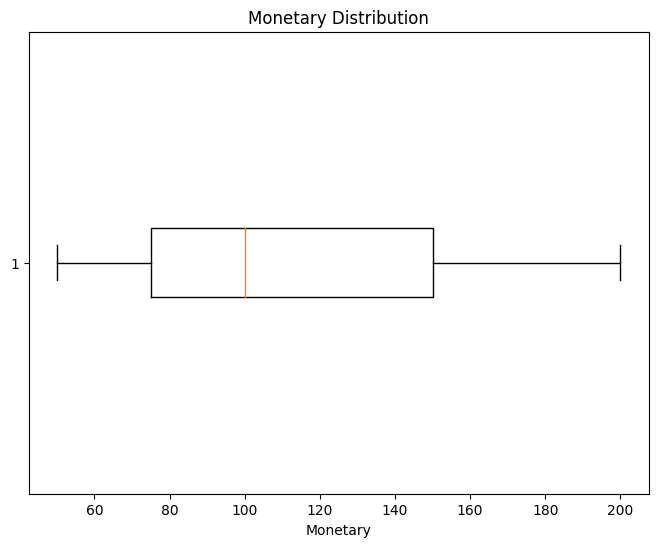

In [15]:
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (replace this with your actual data)
data = pd.DataFrame({
    'CustomerID': [1, 2, 3, 4, 5],
    'PurchaseDate': ['2023-10-01', '2023-09-15', '2023-09-20', '2023-10-02', '2023-10-04'],
    'OrderID': [101, 102, 103, 104, 105],
    'TransactionAmount': [100, 50, 75, 150, 200]
})

# Calculate Recency, Frequency, and Monetary scores
today = pd.to_datetime(dt.date(2023, 10, 6))

# Convert purchase date to Timestamp
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'])

# Calculate Recency based on the maximum purchase date
rfm = data.groupby('CustomerID').agg({
    'PurchaseDate': lambda x: (today - x.max()).days,
    'OrderID': 'count',
    'TransactionAmount': 'sum'
})

# Rename columns
rfm.rename(columns={'PurchaseDate': 'Recency', 'OrderID': 'Frequency', 'TransactionAmount': 'Monetary'}, inplace=True)

# Check the RFM DataFrame
print(rfm.head())

# Data visualization using a pie chart
plt.figure(figsize=(6, 6))
plt.pie(rfm['Frequency'], labels=rfm.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'orange'])
plt.title('Customer Frequency Distribution')
plt.axis('equal')
plt.show()

# Data visualization using a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(rfm['Monetary'], vert=False)
plt.xlabel('Monetary')
plt.title('Monetary Distribution')
plt.show()

